In [162]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [163]:
chips_data = pd.read_csv('ex2data2.txt', names=["test 1", "test 2", "result"])
chips_data.head()

,test 1,test 2,result
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


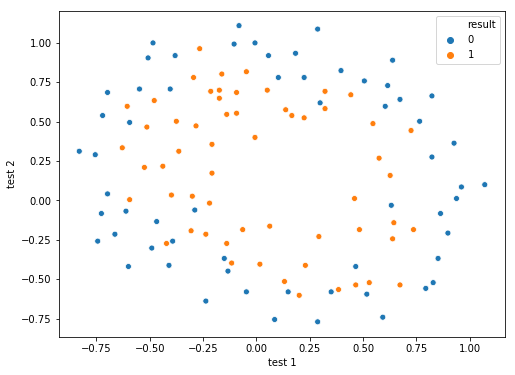

In [164]:
# let's plot this data

plt.figure(figsize=(8, 6))
sns.scatterplot(x="test 1", y="test 2", hue="result", 
                data=chips_data)

In [165]:
# feature mapping

def feature_map(x1, x2, degree):
    fVec = np.ones(x1.shape[0])[:, np.newaxis] # adding the additinal '0' feature
    for i in range(1, degree+1):
        for j in range(i+1):
            # print("x^{}.y^{}".format(i-j, j)) # if you want to visualize how it works
            fVec = np.hstack((fVec, np.multiply(np.power(x1, i-j), np.power(x2, j))[:, np.newaxis]))
    return fVec

In [166]:
# let's define the functions

def sigmoid(inpt):
    return 1/(1+np.exp(-inpt))

def cost_func(coeffs, x, y, lmbda):
    '''regularized cost function'''
    
    # reshaping
    m, n = x.shape
    coeffs = coeffs.reshape((n, 1))
    y = y.reshape((m, 1))
    
    m = x.shape[0]
    h = sigmoid(np.dot(x, coeffs))
    first_term = np.dot(y.T,np.log(h))
    second_term = np.dot((1-y).T, np.log(1-h))
    J = (-1/m)*(first_term + second_term).sum() # the sum() is to convert an array to a number
    additional_term = (lmbda/(2*m)) * np.square(coeffs).sum() # this is the regularization term
    return (J + additional_term)

def gradient(coeffs, x, y, lmbda):
    '''computes the regularized gradient at a particular point and returns the gradient vector'''
    
    # reshaping
    m, n = x.shape
    coeffs = coeffs.reshape((n, 1))
    y = y.reshape((m, 1))
      
    h = sigmoid(np.dot(x, coeffs))
    error = h-y
    gradientVec = (1/m)*np.dot(x.T, error)
    gradientVec[1:] += (lmbda/m)*coeffs[1:]
    return gradientVec

def gradient_descent(coeffs, x, y, lmbda):
    alpha = 0.5
    iters = 2000
    m=len(y)
    J_history = []
    for i in range(iters):
        gradVec = gradient(coeffs, x, y, lmbda)
        coeffs = coeffs - (alpha*gradVec)
        J_history.append(cost_func(coeffs, x, y, lmbda))
        
    return coeffs, J_history

In [167]:
# setting up the variables

X = feature_map(chips_data.iloc[:, 0], chips_data.iloc[:, 1], 6)
y = chips_data.iloc[:, -1][:, np.newaxis]
coeffs = np.zeros(X.shape[1])[:, np.newaxis]
lmbda = 1

In [168]:
cost_func(coeffs, X, y, lmbda)

0.6931471805599454

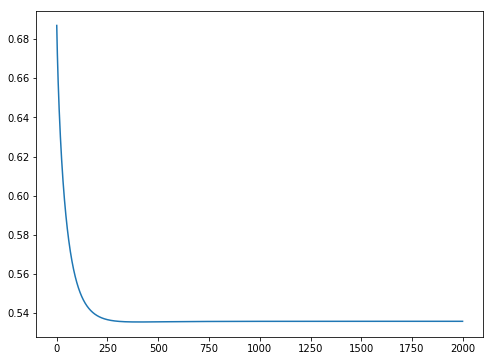

In [169]:
coeffs_opt, J_history = gradient_descent(coeffs, X, y, 1)
plt.figure(figsize=(8, 6))
plt.plot(J_history)

In [170]:
# let's use scipys optimize function to find the optimal coefficients

from scipy import optimize

result = optimize.minimize(fun=cost_func, x0=coeffs, args=(X, y, lmbda), method='TNC', jac=gradient)
optimal_coeffs_tnc = result.x

In [171]:
# now let's compare gradient descents coefficients with optimize coefficients
print(coeffs_opt.flatten())
print()
print(optimal_coeffs_tnc) # almost the same

[ 1.27272637  0.62526699  1.18107986 -2.01992999 -0.91739493 -1.43161682
  0.12401466 -0.3655409  -0.35726    -0.17511363 -1.45816804 -0.05101423
 -0.61556894 -0.27470006 -1.19282169 -0.24218146 -0.20601512 -0.04475604
 -0.27778232 -0.29538165 -0.45637226 -1.04321687  0.02775403 -0.29244193
  0.01555166 -0.32738433 -0.1438839  -0.92468416]

[ 1.25441461  0.6227677   1.19242754 -2.00505484 -0.87290685 -1.36184261
  0.1257381  -0.35536827 -0.35603633 -0.17096327 -1.45784653 -0.06683327
 -0.61498646 -0.25080274 -1.18096053 -0.22566841 -0.2056289  -0.06382342
 -0.2718703  -0.2765899  -0.46836089 -1.03247375  0.01627585 -0.29695278
  0.0058107  -0.32631643 -0.12073371 -0.93023097]


In [177]:
# now let's compare both the accuracies

pred1 = [sigmoid(X@coeffs_opt.flatten()) >= 0.5] # gradient descent
(pred1 == y.flatten()).mean()

0.8305084745762712

In [178]:
pred = [sigmoid(X@optimal_coeffs_tnc) >= 0.5] #  scipy's optimize tnc
(pred == y.flatten()).mean()

0.8305084745762712

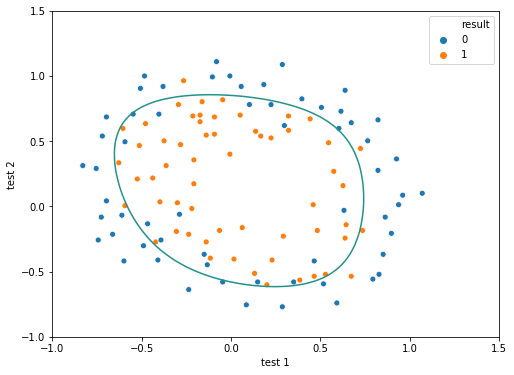

In [174]:
# let's plot the decision boundary

def feature_mapPlot(x1, x2, degree): 
    '''feature mapping for plotting.
    Modified so that it can accept a single element rather than an array as argument'''
    fVec = np.ones(1)
    for i in range(1, degree+1):
        for j in range(i+1):
            terms = (x1**(i-j)) * (x2**j)
            fVec = np.hstack((fVec, terms))
    return fVec

u_vals = np.linspace(-1, 1.5, 100)
v_vals = np.linspace(-1, 1.5, 100)
z = np.zeros((len(u_vals), len(v_vals)))
for i in range(len(u_vals)):
    for j in range(len(v_vals)):
        z[i][j] = feature_mapPlot(u_vals[i], v_vals[j], 6) @ optimal_coeffs_tnc # @ can be used in place of dot product
plt.figure(figsize=(8, 6))
plt.contour(u_vals, v_vals, z.T, 0)
sns.scatterplot(x="test 1", y="test 2", hue="result", 
                data=chips_data)

In [175]:
# testing np.hstack()
a = np.array([[1], [2], [3]])
b = np.array([[3], [4], [5]])
np.hstack((a, b))

array([[1, 3],
       [2, 4],
       [3, 5]])

References:
<br>https://medium.com/analytics-vidhya/python-implementation-of-andrew-ngs-machine-learning-course-part-2-2-dceff1a12a12
<br>https://towardsdatascience.com/andrew-ngs-machine-learning-course-in-python-regularized-logistic-regression-lasso-regression-721f311130fb